# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import importlib
import sys
import os

sys.path.append("../../..")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

import nucml.exfor.data_utilities as exfor_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.endf.data_utilities as endf_utils
import nucml.datasets as nuc_data
import nucml.endf.plotting_utilities as endf_plot

In [2]:
importlib.reload(exfor_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(endf_plot)
print("Finish importing scripts.")

Finish importing scripts.


In [3]:
# Setting up the path where our figures will be stored
figure_dir = "./Figures/"

# Importing EXFOR and ENDF Data

### Loading EXFOR Data

In [4]:
df = nuc_data.load_exfor()

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: False
INFO:root: LOG: False
INFO:root: BASIC: -1
INFO:root: SCALER: STD
INFO:root:Reading data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\EXFOR\CSV_Files\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4255409, 98)
INFO:root:Finished. Resulting dataset has shape (4255409, 98)


In [14]:
df.describe(include='all')

,Projectile,Target_Metastable_State,MT,Product_Metastable_State,EXFOR_Status,Center_of_Mass_Flag,Energy,dEnergy,Data,dData,ELV/HL,dELV/HL,I78,Short_Reference,EXFOR_Accession_Number,EXFOR_SubAccession_Number,EXFOR_Pointer,Z,Reaction_Notation,Title,Year,Author,Institute,Date,Reference,Dataset_Number,EXFOR_Entry,Reference_Code,Projectile_Z,Projectile_A,Projectile_N,Isotope,Element,N,A,Element_Flag,Nucleus_Radius,Neutron_Nucleus_Radius_Ratio,O,Mass_Excess,dMass_Excess,Binding_Energy,dBinding_Energy,B_Decay_Energy,dB_Decay_Energy,Atomic_Mass_Micro,dAtomic_Mass_Micro,S(2n),dS(2n),S(2p),dS(2p),Q(a),dQ(a),Q(2B-),dQ(2B-),Q(ep),dQ(ep),Q(B-n),dQ(B-n),S(n),dS(n),S(p),dS(p),Q(4B-),dQ(4B-),"Q(d,a)","dQ(d,a)","Q(p,a)","dQ(p,a)","Q(n,a)","dQ(n,a)","Q(g,p)","Q(g,n)","Q(g,pn)","Q(g,d)","Q(g,t)","Q(g,He3)","Q(g,2p)","Q(g,2n)","Q(g,a)","Q(p,n)","Q(p,2p)","Q(p,pn)","Q(p,d)","Q(p,2n)","Q(p,t)","Q(p,3He)","Q(n,2p)","Q(n,np)","Q(n,d)","Q(n,2n)","Q(n,t)","Q(n,3He)","Q(d,t)","Q(d,3He)","Q(3He,t)","Q(3He,a)","Q(t,a)"
count,4255409,4255409,4255409,4255409,4255409,4255409,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4255409,4255409,4255409,4.255409e+06,4255409,4.255409e+06,4255409,4255409,4.255409e+06,4255409,4255409,4255409,4255409,4255409,4255409,4255409,4255409.0,4255409.0,4255409.0,4255409,4255409,4.255409e+06,4.255409e+06,4255409,4.255409e+06,4.255409e+06,4255409,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06,4.255409e+06
unique,1,4,40,8,7,2,NaN,NaN,NaN,NaN,NaN,NaN,6,5046,5477,NaN,16,NaN,7493,5323,NaN,2903,452,1535,5465,26649,5477,5498,NaN,NaN,NaN,530,98,NaN,NaN,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neutron,All_or_Total,1,All_or_Total,Other,Lab,NaN,NaN,NaN,NaN,NaN,NaN,Other,"J.A.Harvey,ET.AL. (88)",13632,NaN,No Pointer,NaN,"26-FE-0(N,TOT),,SIG",No Title Found. Check EXFOR.,NaN,J.A.Harvey+,1USAORL,1997/02/05,"Book. Atlas of Neutron Resonances, S.F.Mughabg...",22331004,13632,"(B,NEUT.RES,,2006)",NaN,NaN,NaN,56Fe,U,NaN,NaN,I,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4255409,4243232,3229171,4238714,2181990,4250745,NaN,NaN,NaN,NaN,NaN,NaN,4116656,186096,165926,NaN,4198027,NaN,173046,256144,NaN,512548,1804518,257947,233874,49709,165926,233874,NaN,NaN,NaN,238200,478297,NaN,NaN,3218578,NaN,NaN,4201804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.808464e+06,3.377364e+05,6.373352e+03,inf,5.930286e+04,4.635693e+04,NaN,NaN,NaN,6.279618e+00,NaN,5.322682e+01,NaN,NaN,1.981991e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,7.712451e+01,1.303513e+02,NaN,5.934967e+00,1.488284e-01,NaN,-2.180359e+04,5.568818e-01,8.092269e+03,-3.007554e-02,-2.913318e+03,7.252719e+00,1.303370e+08,5.974024e-01,1.759613e+0

# Exploratory Data Analysis

Let us study the dataset and analyze the distributions.

In [5]:
sns.set(font_scale=1)
sns.set_style("white")

We can see that several features are extremeley negatively skewed. This introduces problems to almost all ML algorithms as we shall demonstrate in the next notebook. 

In [6]:
from scipy.stats import skew

- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [8]:
numerical_columns = df.select_dtypes(include=['float64']).columns

In [9]:
case_list = {}

for col in numerical_columns:
    skewness = skew(df[col].values)
    case = {col: skewness}
    case_list.update(case)
    
skew_df = pd.Series(case_list).to_frame().reset_index()
skew_df.columns = ["Column_Name", "Skewness"]
skew_df = skew_df.sort_values(by=["Skewness"], ascending=False)

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\scipy\stats\stats.py:1082: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


In [12]:
print(skew_df.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                  Column\_Name &    Skewness \\
\midrule
                       ELV/HL &  724.315247 \\
                      dELV/HL &  722.899187 \\
                       Energy &  689.584529 \\
                      dEnergy &  164.811156 \\
                         Data &  139.742977 \\
                       dS(2n) &   18.848509 \\
              dB\_Decay\_Energy &   18.374140 \\
                      dQ(4B-) &   13.804831 \\
                      dQ(d,a) &   13.125649 \\
                      dQ(n,a) &   11.654097 \\
                      dQ(B-n) &    8.350713 \\
                      dQ(2B-) &    8.238419 \\
                        dQ(a) &    7.692839 \\
                       dS(2p) &    7.268825 \\
                        dS(p) &    6.330616 \\
                       dQ(ep) &    4.868759 \\
 Neutron\_Nucleus\_Radius\_Ratio &    2.652843 \\
                        S(2n) &    1.001953 \\
                         S(p) &    1.001594 \\
                

In [234]:
# In addition to all uncertanties
# skewed_cols = ["Binding_Energy", "ELV/HL", "Energy", "dBinding_Energy", "dELV/HL", "dEnergy"]
skewed_cols = ["Energy", "dEnergy"]

In [14]:
energy_log = np.log10(df["Energy"].values)
energy_ln = np.log(df["Energy"].values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190D1AAB1D0>]],
      dtype=object)

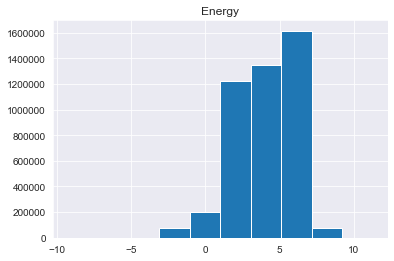

In [235]:
df[["Energy"]].hist()

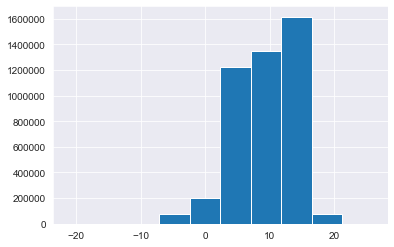

In [17]:
plt.hist(energy_ln)
plt.show()

In [18]:
for col in skewed_cols:
    log_values = np.log10(df[col].values)
    df[col] = log_values

In [23]:
df["Year"] = df["Year"].astype(int)

# Categorical Data

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our data variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [14]:
grouped_test = df[['MT', 'Data']].groupby(['MT'])

f_val, p_val = stats.f_oneway(grouped_test.get_group("1")['Data'], grouped_test.get_group('101')['Data'], grouped_test.get_group('102')['Data'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 15917.016298247428 , P = 0.0


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

In [354]:
def box_plot(x, dataframe=df, figsize=(8,6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=x, y="Data", data=dataframe)

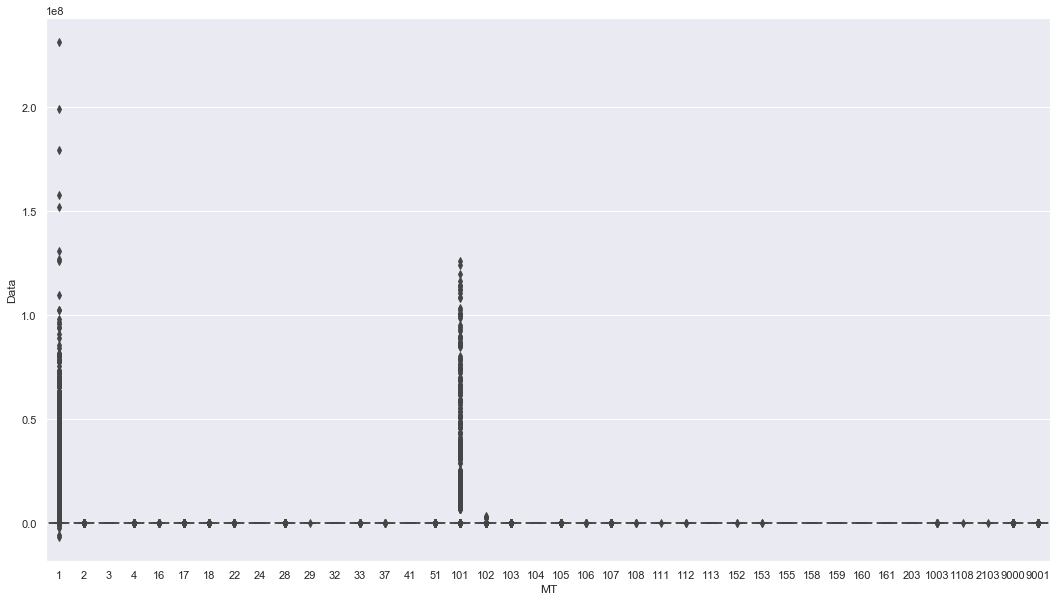

In [355]:
box_plot("MT", figsize=(18,10))

The values for other reaction types get squashed do the large magnitude of fission and total cross section data points (MT1 and MT101). Still it is noticable that these cross sections are magnitudes higher than other types. This feature will be helpful in determining limits to some reaction types (it will learn not to go above certan values.

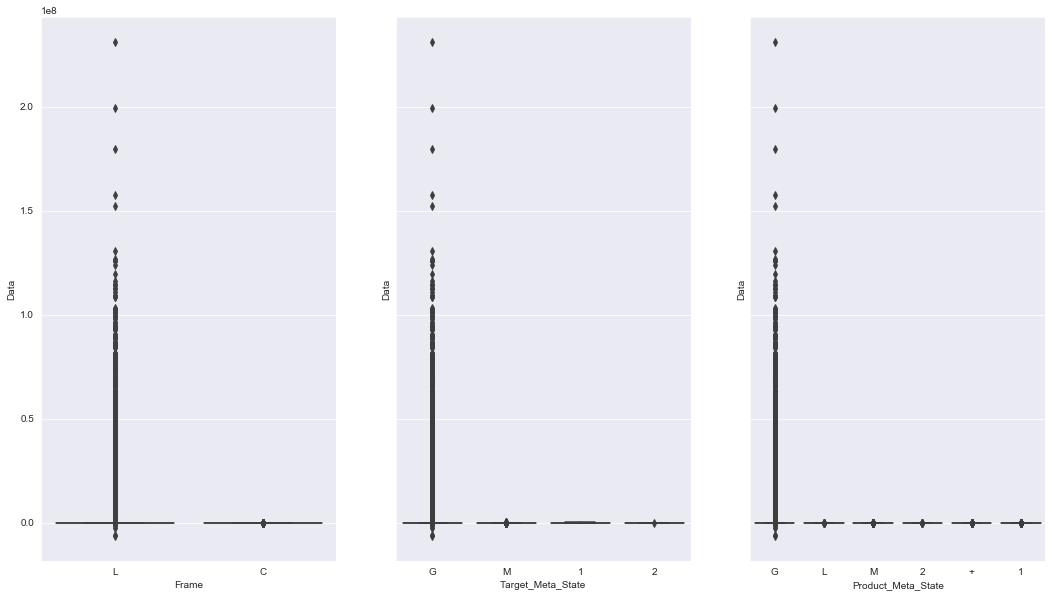

In [18]:
# call regplot on each axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,10))
sns.boxplot(x="Frame", y="Data", data=df, ax=ax1)
sns.boxplot(x="Target_Meta_State", y="Data", data=df, ax=ax2)
sns.boxplot(x="Product_Meta_State", y="Data", data=df, ax=ax3)